**Agglomerative Clustering** or bottom-up clustering essentially started from an individual cluster (each data point is considered as an individual cluster, also called leaf), then every cluster calculates their distance with each other. The two clusters with the shortest distance with each other would merge creating what we called node. Newly formed clusters once again calculating the member of their cluster distance with another cluster outside of their cluster. The process is repeated until all the data points assigned to one cluster called root. The result is a tree-based representation of the objects called dendrogram.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/nutrition.csv')
data.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,0.000 mg,0.000 mg,0.000 mg,0.000 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,0,0.00 mcg,0.000 mg,0.0 mg,0.00 IU,0.00 mg,0.00 mg,0.0 mcg,2.00 mg,0.050 mg,0.47 mg,3.00 mg,0.053 mg,13.00 mg,3.00 mg,2.8 mcg,0.06 mg,0.26 g,0.019 g,0.012 g,0.020 g,0.006 g,0.053 g,0.009 g,0.008 g,0,0.010 g,0.036 g,0.006 g,0.006 g,0.013 g,0.024 g,0.012 g,0.009 g,0.001 g,0.010 g,0.014 g,91.27 g,0.9 g,0.00 g,0,0,0,0,0,0,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,0.649 mg,0.281 mg,0.037 mg,0.039 mg,23.00 IU,1.00 mcg,0.00 mcg,14.00 mcg,0.00 mcg,36.00 mcg,0,0.00 mcg,0.084 mg,2.2 mg,0.00 IU,0.30 mg,0.30 mg,3.5 mcg,9.00 mg,0.081 mg,0.23 mg,14.00 mg,0.232 mg,24.00 mg,229.00 mg,0.3 mcg,0.16 mg,0.98 g,0.051 g,0.057 g,0.164 g,0.006 g,0.186 g,0.041 g,0.023 g,0,0.045 g,0.064 g,0.047 g,0.011 g,0.043 g,0.043 g,0.042 g,0.037 g,0.009 g,0.027 g,0.053 g,5.88 g,3.0 g,3.53 g,1.54 g,0,1.58 g,0,0,0.26 g,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
#Drop the serving_size column
data.drop('serving_size', axis = 1, inplace = True)
#Fill the NaN value with 0
data.fillna(0, inplace = True)


In [ ]:
#I would use Regular Expression Module to help me clean the data
import re
#Looping in each non-numerical features except the name feature 
for col in data.drop('name',axis = 1).select_dtypes(exclude = 'number').columns:
    for i in data[col]:
        if i == '0' or i == 0:
            pass
        else:
            point = re.findall('[a-zA-Z]+',i)[0]
            replace = []
            if point == 'mg':
                for j in data[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:
                        replace.append(float(re.sub('[a-zA-Z]','',j))/1000)
            elif point == 'mcg':
                for j in data[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:
                        replace.append(float(re.sub('[a-zA-Z]','',j))/1000000)  
            else:
                 for j in data[col]:
                    if j == '0' or j == 0:
                        replace.append(float(j))
                    else:       
                        replace.append(float(re.sub('[a-zA-Z]','',j)))
                        
            data[col] = replace    
            data.rename({col:col+'(g)'}, axis =1, inplace = True)
            break

In [ ]:
data

,Unnamed: 0,name,calories,total_fat(g),saturated_fat(g),cholesterol(g),sodium(g),choline(g),folate(g),folic_acid(g),...,fat(g),saturated_fatty_acids(g),monounsaturated_fatty_acids(g),polyunsaturated_fatty_acids(g),fatty_acids_total_trans(g),alcohol(g),ash(g),caffeine(g),theobromine(g),water(g)
0,0,Cornstarch,381,0.1,0.0,0.000,0.009,0.0004,0.000000,0.0,...,0.05,0.009,0.016,0.025,0.000,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",691,72.0,6.2,0.000,0.000,0.0405,0.000022,0.0,...,71.97,6.180,40.801,21.614,0.000,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",25,0.2,0.0,0.000,0.002,0.0069,0.000022,0.0,...,0.18,0.034,0.016,0.076,0.000,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",367,2.4,0.4,0.000,0.012,0.0131,0.000000,0.0,...,2.38,0.449,0.589,1.071,0.000,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",144,2.0,1.2,0.001,0.046,0.0077,0.000004,0.0,...,2.00,1.160,0.530,0.080,0.001,0.0,0.40,0.0,0.0,66.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5,1.4,0.062,0.054,0.0645,0.000004,0.0,...,3.50,1.353,1.554,0.244,0.062,0.0,1.11,0.0,0.0,72.51
8785,8785,"Lamb, cooked, separable lean only, composite o...",206,8.9,3.9,0.109,0.050,0.0000,0.000000,0.0,...,8.86,3.860,3.480,0.520,0.109,0.0,1.60,0.0,0.0,59.95
8786,8786,"Lamb, raw, separable lean and fat, composite o...",277,23.0,12.0,0.078,0.039,0.0000,0.000001,0.0,...,22.74,11.570,8.720,0.980,0.078,0.0,0.92,0.0,0.0,59.80
8787,8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",121,3.0,1.1,0.060,0.053,0.0642,0.000004,0.0,...,3.04,1.086,1.266,0.233,0.060,0.0,1.10,0.0,0.0,73.43


In [ ]:
data['food_categories'] = data['name'].apply(lambda x: x.split(',')[0])

In [ ]:
//for i in data.select_dtypes('number').columns:
    sns.disttplot(data[i])
    plt.title(i)
    plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
data.agg(['mean', 'median', 'std', 'skew', 'kurtosis'])

,Unnamed: 0,calories,total_fat(g),saturated_fat(g),cholesterol(g),sodium(g),choline(g),folate(g),folic_acid(g),niacin(g),pantothenic_acid(g),riboflavin(g),thiamin(g),vitamin_a(g),vitamin_a_rae(g),carotene_alpha(g),carotene_beta(g),cryptoxanthin_beta(g),lutein_zeaxanthin(g),lucopene,vitamin_b12(g),vitamin_b6(g),vitamin_c(g),vitamin_d(g),vitamin_e(g),tocopherol_alpha(g),vitamin_k(g),calcium(g),copper(g),irom(g),magnesium(g),manganese(g),phosphorous(g),potassium(g),selenium(g),zink(g),protein(g),alanine(g),arginine(g),aspartic_acid(g),cystine(g),glutamic_acid(g),glycine(g),histidine(g),hydroxyproline(g),isoleucine(g),leucine(g),lysine(g),methionine(g),phenylalanine(g),proline(g),serine(g),threonine(g),tryptophan(g),tyrosine(g),valine(g),carbohydrate(g),fiber(g),sugars(g),fructose(g),galactose(g),glucose(g),lactose(g),maltose(g),sucrose(g),fat(g),saturated_fatty_acids(g),monounsaturated_fatty_acids(g),polyunsaturated_fatty_acids(g),fatty_acids_total_trans(g),alcohol(g),ash(g),caffeine(g),theobromine(g),water(g)
mean,4394.000000,226.283878,10.556855,3.434281,0.038723,0.306354,0.023681,0.000044,0.000018,0.003400,0.000484,0.000235,0.000208,676.320514,0.000092,0.000020,0.000142,0.000007,0.000121,0.0,1.201716e-06,0.000261,0.008357,14.560815,0.000886,0.000886,0.000009,0.073317,0.000167,0.002646,0.032262,0.000496,0.153844,0.265251,0.000012,0.001940,11.345616,0.486991,0.564506,0.768497,0.104868,1.459090,0.445260,0.270972,0.025559,0.393758,0.695874,0.687565,0.217307,0.368084,0.449345,0.369037,0.362793,0.095344,0.297900,0.438582,22.121915,2.040073,6.756293,0.267262,0.004852,0.290416,0.132518,0.071506,0.577029,10.550794,3.434146,3.772313,2.114332,0.038723,0.117522,1.717408,0.002609,0.004696,54.112074
median,4394.000000,191.000000,5.100000,1.400000,0.002000,0.084000,0.001600,0.000009,0.000000,0.002111,0.000274,0.000151,0.000077,20.000000,0.000002,0.000000,0.000000,0.000000,0.000000,0.0,7.000000e-08,0.000119,0.000000,0.000000,0.000120,0.000120,0.000000,0.019000,0.000077,0.001310,0.020000,0.000022,0.129000,0.219000,0.000004,0.000800,8.020000,0.085000,0.097000,0.145000,0.017000,0.336000,0.064000,0.044000,0.000000,0.083000,0.133000,0.097000,0.032000,0.088000,0.088000,0.085000,0.078000,0.021000,0.060000,0.107000,9.340000,0.400000,0.490000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.130000,1.435000,1.600000,0.591000,0.002000,0.000000,1.170000,0.000000,0.000000,63.080000
std,2537.310091,169.862001,15.818247,6.429758,0.117359,0.939220,0.051332,0.000128,0.000101,0.004765,0.001252,0.000441,0.000510,3694.739553,0.000772,0.000255,0.001031,0.000123,0.000911,0.0,4.271908e-06,0.000468,0.065625,123.643892,0.003813,0.003813,0.000062,0.199850,0.000543,0.005661,0.055838,0.006302,0.202198,0.371444,0.000027,0.003336,10.530602,0.659244,0.775294,1.044862,0.140665,1.818475,0.678858,0.366762,0.077800,0.515112,0.896937,0.950281,0.296446,0.471174,0.599768,0.478534,0.476645,0.127419,0.392489,0.566133,27.266261,4.269181,13.718890,1.566965,0.078666,1.701835,1.844355,0.439321,3.952760,15.814870,6.426586,6.826234,5.050045,0.117359,1.600127,2.967751,0.082070,0.060963,30.772999
skew,0.000000,1.149091,3.309571,6.671286,15.322120,22.541058,15.670711,8.955403,10.960558,6.483232,14.880011,11.620170,17.932295,15.455765,24.354559,29.096770,19.195287,38.665834,13.357779,0.0,1.321522e+01,7.690288,29.556392,61.152034,13.894348,13.894348,16.292302,13.464522,16.385837,6.972293,5.669053,40.431121,18.495447,15.560764,40.959541,9.648469,1.165780,1.526716,1.709918,1.458123,2.425748,1.216053,5.896495,1.249226,4.393240,1.351205,1.205814,1.179906,1.399400,1.592434,2.994528,1.901288,1.212337,1.870809,1.345978,1.406269,1.127907,5.807997,2.908293,15.520459,50.189406,15.800818,26.818784,11.270809,12.859808,3.310439,6.664194,4.687086,6.361312,15.322120,18.086341,17.018619,51.058264,28.478954,-0.570849
kurtosis,-1.200000,1.713243,13.754812,71.289600,313.379845,681.887714,587.116891,140.040959,173.398893,99.529939,306.924940,309.606640,602.085901,309.239687,732.687738,1260.428322,574.7759

In [ ]:
data['calories'].describe()

count    8789.000000
mean      226.283878
std       169.862001
min         0.000000
25%        91.000000
50%       191.000000
75%       337.000000
max       902.000000
Name: calories, dtype: float64

In [ ]:
##Specifying the limit
cal_Q1 = data.describe()['calories']['25%']
cal_Q3 = data.describe()['calories']['75%']
cal_IQR = cal_Q3 - cal_Q1
data[(data['calories'] < 1.5 * (cal_Q1 - cal_IQR)) | (data['calories'] > 1.5 * (cal_Q3 + cal_IQR)) ]['food_categories'].value_counts()

Oil                                                     72
Shortening                                              10
Fish oil                                                 6
Fat                                                      6
Shortening frying (heavy duty)                           3
Shortening industrial                                    2
USDA Commodity Food                                      2
Butter oil                                               1
Lard                                                     1
Animal fat                                               1
Pork                                                     1
Shortening household soybean (hydrogenated) and palm     1
Meat drippings (lard                                     1
Shortening bread                                         1
Shortening confectionery                                 1
Shortening cake mix                                      1
Name: food_categories, dtype: int64

In [ ]:
data1=data
data1

,Unnamed: 0,name,calories,total_fat(g),saturated_fat(g),cholesterol(g),sodium(g),choline(g),folate(g),folic_acid(g),niacin(g),pantothenic_acid(g),riboflavin(g),thiamin(g),vitamin_a(g),vitamin_a_rae(g),carotene_alpha(g),carotene_beta(g),cryptoxanthin_beta(g),lutein_zeaxanthin(g),lucopene,vitamin_b12(g),vitamin_b6(g),vitamin_c(g),vitamin_d(g),vitamin_e(g),tocopherol_alpha(g),vitamin_k(g),calcium(g),copper(g),irom(g),magnesium(g),manganese(g),phosphorous(g),potassium(g),selenium(g),zink(g),protein(g),alanine(g),arginine(g),aspartic_acid(g),cystine(g),glutamic_acid(g),glycine(g),histidine(g),hydroxyproline(g),isoleucine(g),leucine(g),lysine(g),methionine(g),phenylalanine(g),proline(g),serine(g),threonine(g),tryptophan(g),tyrosine(g),valine(g),carbohydrate(g),fiber(g),sugars(g),fructose(g),galactose(g),glucose(g),lactose(g),maltose(g),sucrose(g),fat(g),saturated_fatty_acids(g),monounsaturated_fatty_acids(g),polyunsaturated_fatty_acids(g),fatty_acids_total_trans(g),alcohol(g),ash(g),caffeine(g),theobromine(g),water(g),food_categories
0,0,Cornstarch,381,0.1,0.0,0.000,0.009,0.0004,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000e+00,0.000000,0.0000,0.0,0.00000,0.00000,0.000000,0.002,0.000050,0.00047,0.003,0.000053,0.013,0.003,2.800000e-06,0.00006,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.000,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.000,0.0,0.09,0.0,0.0,8.32,Cornstarch
1,1,"Nuts, pecans",691,72.0,6.2,0.000,0.000,0.0405,0.000022,0.0,0.001167,0.000863,0.000130,0.000660,56.0,0.000003,0.0,0.000029,0.000009,0.000017,0,0.000000e+00,0.000210,0.0011,0.0,0.00140,0.00140,0.000003,0.070,0.001200,0.00253,0.121,0.004500,0.277,0.410,3.800000e-06,0.00453,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.000,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.000,0.0,1.49,0.0,0.0,3.52,Nuts
2,2,"Eggplant, raw",25,0.2,0.0,0.000,0.002,0.0069,0.000022,0.0,0.000649,0.000281,0.000037,0.000039,23.0,0.000001,0.0,0.000014,0.000000,0.000036,0,0.000000e+00,0.000084,0.0022,0.0,0.00030,0.00030,0.000003,0.009,0.000081,0.00023,0.014,0.000232,0.024,0.229,3.000000e-07,0.00016,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.000,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.000,0.0,0.66,0.0,0.0,92.30,Eggplant
3,3,"Teff, uncooked",367,2.4,0.4,0.000,0.012,0.0131,0.000000,0.0,0.003363,0.000942,0.000270,0.000390,9.0,0.000000,0.0,0.000005,0.000000,0.000066,0,0.000000e+00,0.000482,0.0000,0.0,0.00008,0.00008,0.000002,0.180,0.000810,0.00763,0.184,0.009240,0.429,0.427,4.400000e-06,0.00363,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.000,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.000,0.0,2.37,0.0,0.0,8.82,Teff
4,4,"Sherbet, orange",144,2.0,1.2,0.001,0.046,0.0077,0.000004,0.0,0.000063,0.000224,0.000097,0.000027,46.0,0.000012,0.0,0.000001,0.000005,0.000007,0,1.300000e-07,0.000023,0.0023,0.0,0.00001,0.00001,0.000000,0.054,0.000028,0.00014,0.008,0.000011,0.040,0.096,1.500000e-06,0.00048,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,0.001,0.0,0.40,0.0,0.0,66.10,Sherbet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",125,3.5,1.4,0.062,0.054,0.0645,0.000004,0.0,0.006422,0.000356,0.000234,0.000063,11.0,0.000003,0.0

In [ ]:
data1=data1.drop(labels='name', axis=1)

KeyError: ignored

In [ ]:
data1

,Unnamed: 0,calories,total_fat(g),saturated_fat(g),cholesterol(g),sodium(g),choline(g),folate(g),folic_acid(g),niacin(g),pantothenic_acid(g),riboflavin(g),thiamin(g),vitamin_a(g),vitamin_a_rae(g),carotene_alpha(g),carotene_beta(g),cryptoxanthin_beta(g),lutein_zeaxanthin(g),lucopene,vitamin_b12(g),vitamin_b6(g),vitamin_c(g),vitamin_d(g),vitamin_e(g),tocopherol_alpha(g),vitamin_k(g),calcium(g),copper(g),irom(g),magnesium(g),manganese(g),phosphorous(g),potassium(g),selenium(g),zink(g),protein(g),alanine(g),arginine(g),aspartic_acid(g),cystine(g),glutamic_acid(g),glycine(g),histidine(g),hydroxyproline(g),isoleucine(g),leucine(g),lysine(g),methionine(g),phenylalanine(g),proline(g),serine(g),threonine(g),tryptophan(g),tyrosine(g),valine(g),carbohydrate(g),fiber(g),sugars(g),fructose(g),galactose(g),glucose(g),lactose(g),maltose(g),sucrose(g),fat(g),saturated_fatty_acids(g),monounsaturated_fatty_acids(g),polyunsaturated_fatty_acids(g),fatty_acids_total_trans(g),alcohol(g),ash(g),caffeine(g),theobromine(g),water(g),food_categories
0,0,381,0.1,0.0,0.000,0.009,0.0004,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000e+00,0.000000,0.0000,0.0,0.00000,0.00000,0.000000,0.002,0.000050,0.00047,0.003,0.000053,0.013,0.003,2.800000e-06,0.00006,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.000,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.000,0.0,0.09,0.0,0.0,8.32,Cornstarch
1,1,691,72.0,6.2,0.000,0.000,0.0405,0.000022,0.0,0.001167,0.000863,0.000130,0.000660,56.0,0.000003,0.0,0.000029,0.000009,0.000017,0,0.000000e+00,0.000210,0.0011,0.0,0.00140,0.00140,0.000003,0.070,0.001200,0.00253,0.121,0.004500,0.277,0.410,3.800000e-06,0.00453,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.000,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.000,0.0,1.49,0.0,0.0,3.52,Nuts
2,2,25,0.2,0.0,0.000,0.002,0.0069,0.000022,0.0,0.000649,0.000281,0.000037,0.000039,23.0,0.000001,0.0,0.000014,0.000000,0.000036,0,0.000000e+00,0.000084,0.0022,0.0,0.00030,0.00030,0.000003,0.009,0.000081,0.00023,0.014,0.000232,0.024,0.229,3.000000e-07,0.00016,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.000,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.000,0.0,0.66,0.0,0.0,92.30,Eggplant
3,3,367,2.4,0.4,0.000,0.012,0.0131,0.000000,0.0,0.003363,0.000942,0.000270,0.000390,9.0,0.000000,0.0,0.000005,0.000000,0.000066,0,0.000000e+00,0.000482,0.0000,0.0,0.00008,0.00008,0.000002,0.180,0.000810,0.00763,0.184,0.009240,0.429,0.427,4.400000e-06,0.00363,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.000,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.000,0.0,2.37,0.0,0.0,8.82,Teff
4,4,144,2.0,1.2,0.001,0.046,0.0077,0.000004,0.0,0.000063,0.000224,0.000097,0.000027,46.0,0.000012,0.0,0.000001,0.000005,0.000007,0,1.300000e-07,0.000023,0.0023,0.0,0.00001,0.00001,0.000000,0.054,0.000028,0.00014,0.008,0.000011,0.040,0.096,1.500000e-06,0.00048,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,0.001,0.0,0.40,0.0,0.0,66.10,Sherbet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,125,3.5,1.4,0.062,0.054,0.0645,0.000004,0.0,0.006422,0.000356,0.000234,0.000063,11.0,0.000003,0.0,0.000000,0.000000,0.000000,0,1.640000e-06,0.000631,0.0000,1.0,0.00023,0.00023,0.000002,0.013,0.000048,0.00233,0.012,0.000004,0.219,0.311,2

In [ ]:
data

,Unnamed: 0,calories,total_fat(g),saturated_fat(g),cholesterol(g),sodium(g),choline(g),folate(g),folic_acid(g),niacin(g),pantothenic_acid(g),riboflavin(g),thiamin(g),vitamin_a(g),vitamin_a_rae(g),carotene_alpha(g),carotene_beta(g),cryptoxanthin_beta(g),lutein_zeaxanthin(g),lucopene,vitamin_b12(g),vitamin_b6(g),vitamin_c(g),vitamin_d(g),vitamin_e(g),tocopherol_alpha(g),vitamin_k(g),calcium(g),copper(g),irom(g),magnesium(g),manganese(g),phosphorous(g),potassium(g),selenium(g),zink(g),protein(g),alanine(g),arginine(g),aspartic_acid(g),cystine(g),glutamic_acid(g),glycine(g),histidine(g),hydroxyproline(g),isoleucine(g),leucine(g),lysine(g),methionine(g),phenylalanine(g),proline(g),serine(g),threonine(g),tryptophan(g),tyrosine(g),valine(g),carbohydrate(g),fiber(g),sugars(g),fructose(g),galactose(g),glucose(g),lactose(g),maltose(g),sucrose(g),fat(g),saturated_fatty_acids(g),monounsaturated_fatty_acids(g),polyunsaturated_fatty_acids(g),fatty_acids_total_trans(g),alcohol(g),ash(g),caffeine(g),theobromine(g),water(g),food_categories
0,0,381,0.1,0.0,0.000,0.009,0.0004,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0,0.000000e+00,0.000000,0.0000,0.0,0.00000,0.00000,0.000000,0.002,0.000050,0.00047,0.003,0.000053,0.013,0.003,2.800000e-06,0.00006,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.000,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.000,0.0,0.09,0.0,0.0,8.32,Cornstarch
1,1,691,72.0,6.2,0.000,0.000,0.0405,0.000022,0.0,0.001167,0.000863,0.000130,0.000660,56.0,0.000003,0.0,0.000029,0.000009,0.000017,0,0.000000e+00,0.000210,0.0011,0.0,0.00140,0.00140,0.000003,0.070,0.001200,0.00253,0.121,0.004500,0.277,0.410,3.800000e-06,0.00453,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.000,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.000,0.0,1.49,0.0,0.0,3.52,Nuts
2,2,25,0.2,0.0,0.000,0.002,0.0069,0.000022,0.0,0.000649,0.000281,0.000037,0.000039,23.0,0.000001,0.0,0.000014,0.000000,0.000036,0,0.000000e+00,0.000084,0.0022,0.0,0.00030,0.00030,0.000003,0.009,0.000081,0.00023,0.014,0.000232,0.024,0.229,3.000000e-07,0.00016,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.000,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.000,0.0,0.66,0.0,0.0,92.30,Eggplant
3,3,367,2.4,0.4,0.000,0.012,0.0131,0.000000,0.0,0.003363,0.000942,0.000270,0.000390,9.0,0.000000,0.0,0.000005,0.000000,0.000066,0,0.000000e+00,0.000482,0.0000,0.0,0.00008,0.00008,0.000002,0.180,0.000810,0.00763,0.184,0.009240,0.429,0.427,4.400000e-06,0.00363,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.000,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.000,0.0,2.37,0.0,0.0,8.82,Teff
4,4,144,2.0,1.2,0.001,0.046,0.0077,0.000004,0.0,0.000063,0.000224,0.000097,0.000027,46.0,0.000012,0.0,0.000001,0.000005,0.000007,0,1.300000e-07,0.000023,0.0023,0.0,0.00001,0.00001,0.000000,0.054,0.000028,0.00014,0.008,0.000011,0.040,0.096,1.500000e-06,0.00048,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,0.001,0.0,0.40,0.0,0.0,66.10,Sherbet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,8784,125,3.5,1.4,0.062,0.054,0.0645,0.000004,0.0,0.006422,0.000356,0.000234,0.000063,11.0,0.000003,0.0,0.000000,0.000000,0.000000,0,1.640000e-06,0.000631,0.0000,1.0,0.00023,0.00023,0.000002,0.013,0.000048,0.00233,0.012,0.000004,0.219,0.311,2

In [ ]:
data1=data1.drop(labels='food_categories', axis=1)

In [ ]:
#Importing the transformer
from sklearn.preprocessing import StandardScaler
#Transforming the data, I drop the name feature as we only need the numerical column
scaler = StandardScaler()
model = scaler.fit(data1)
training = model.transform(data1)

Text(0.5, 1.0, 'Agglomerative Clustering')

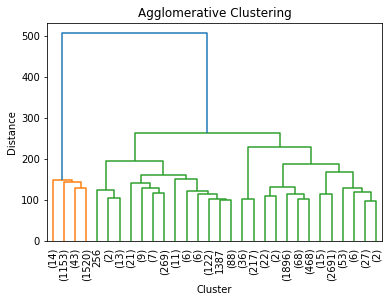

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
#Ward is the most common linkage method
Z = linkage(training,method = 'ward')
dendrogram(Z, truncate_mode = 'lastp')
plt.xticks(rotation = 90, fontsize = 10)
plt.ylabel('Distance')
plt.xlabel('Cluster')
plt.title('Agglomerative Clustering')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#I specify n_clusters to be 2 based on our previous analysis
ach = AgglomerativeClustering(n_clusters = 2)
ach.fit(training)
#Input the label result to the data
data['label'] = ach.labels_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


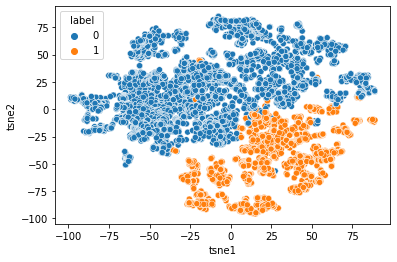

In [ ]:
from sklearn.manifold import TSNE
#t-SNE is based on a stochastic (random) process, that is why I set the random_state so we could repeat the result
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(training) 
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
#Visualize the data
tsne_results['label'] = data['label']
sns.scatterplot(data = tsne_results, x = 'tsne1', y = 'tsne2', hue='label')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


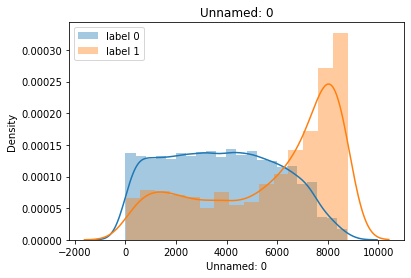

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


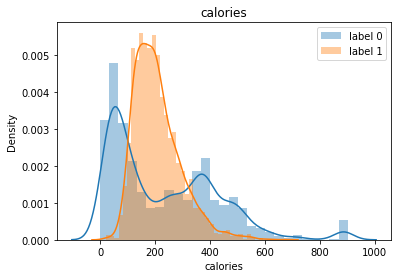

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


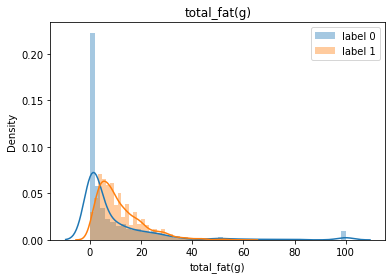

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


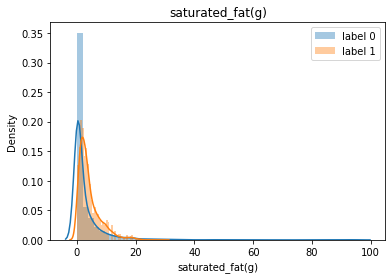

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


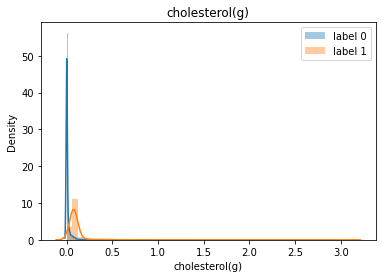

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


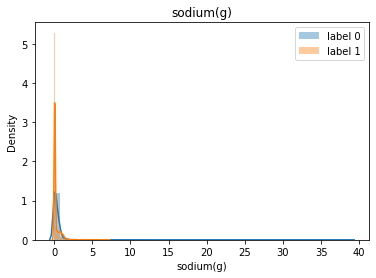

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


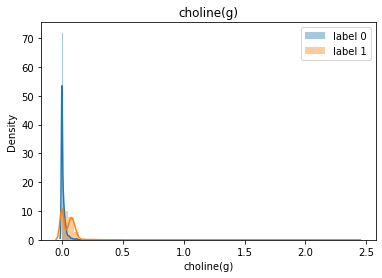

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


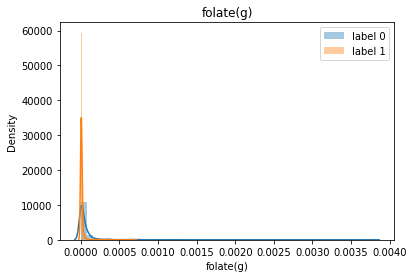

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


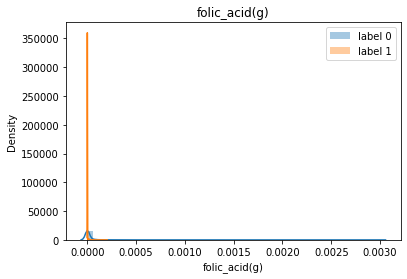

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


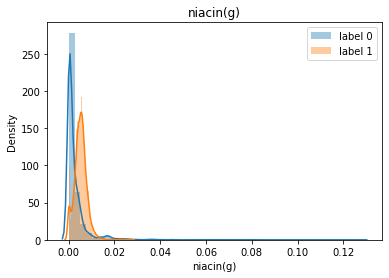

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


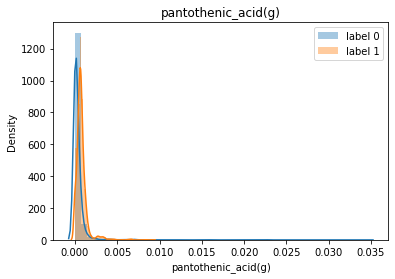

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


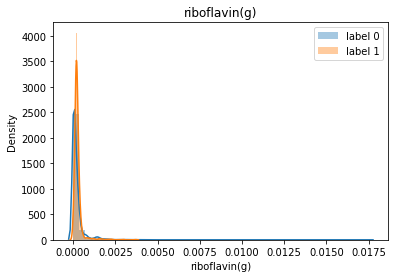

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


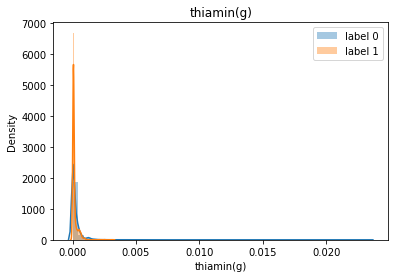

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


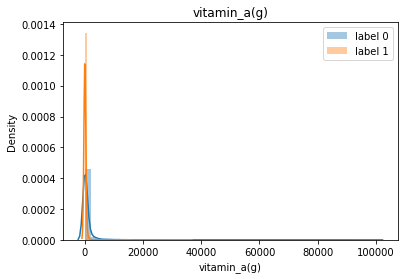

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


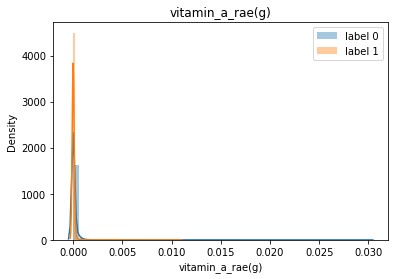

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


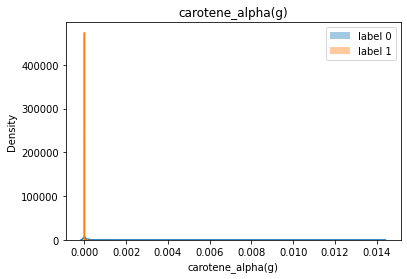

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


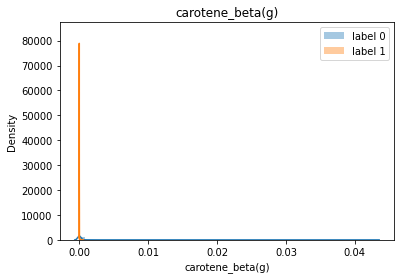

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


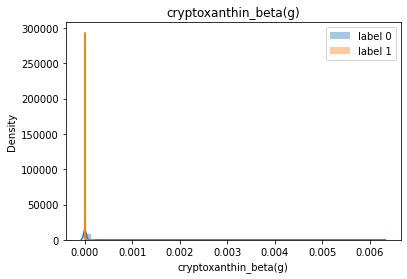

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


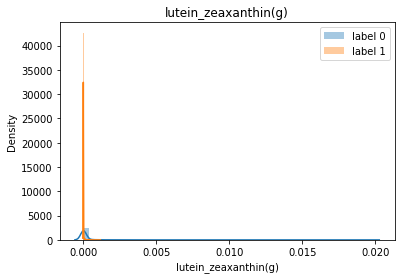

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

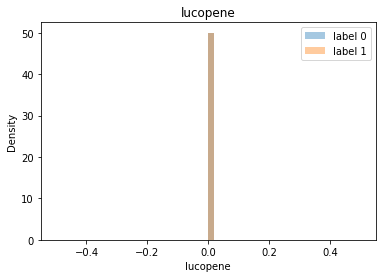

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


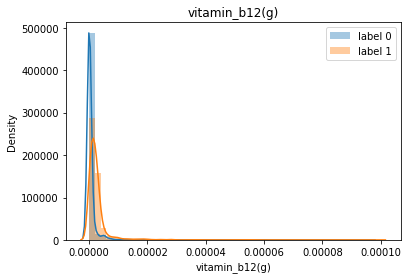

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


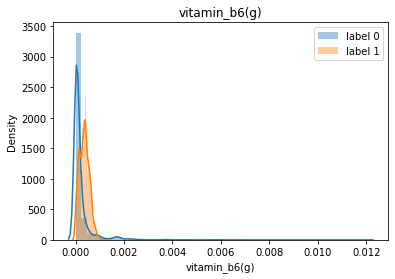

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


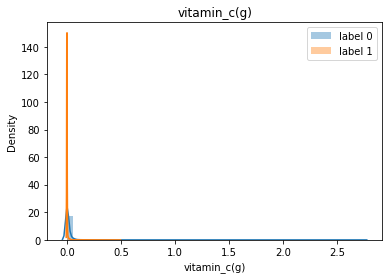

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


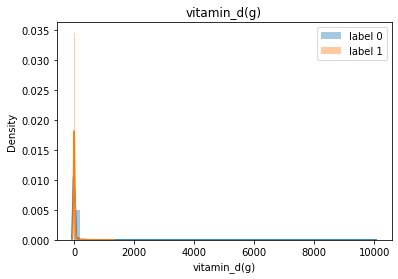

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


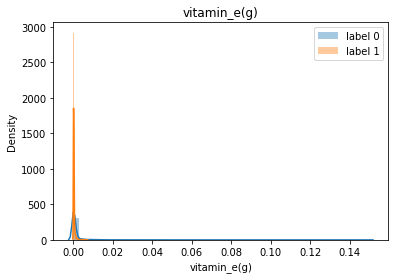

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


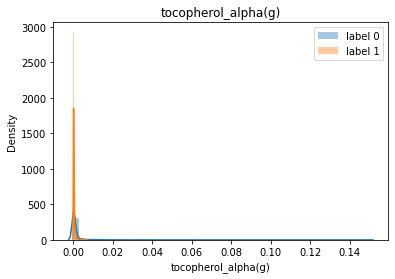

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


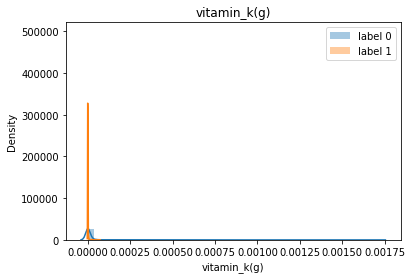

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


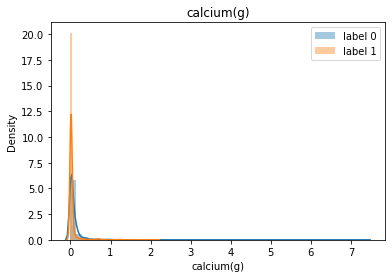

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


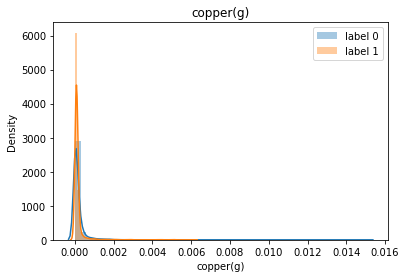

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


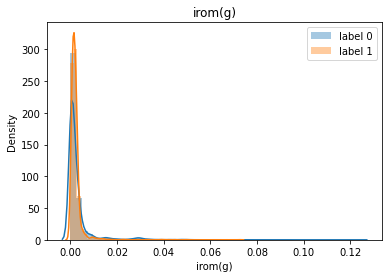

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


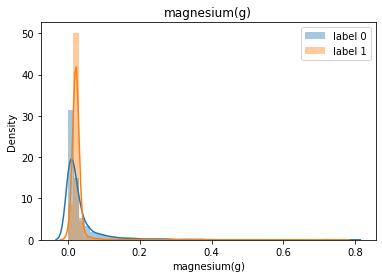

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


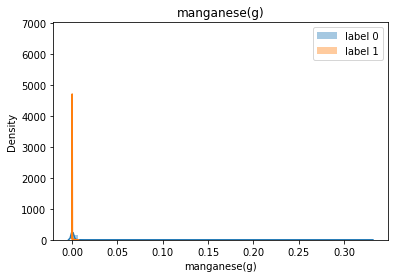

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


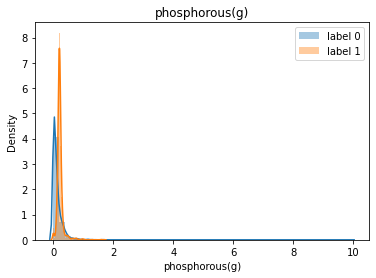

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


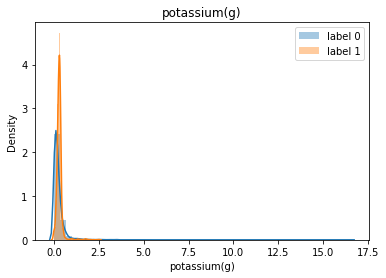

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


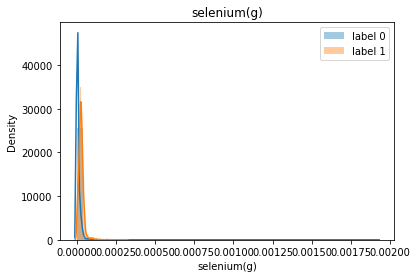

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


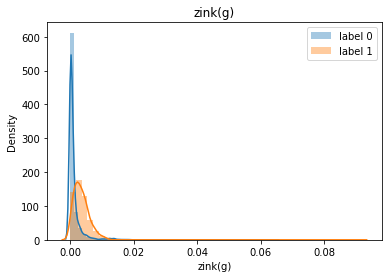

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


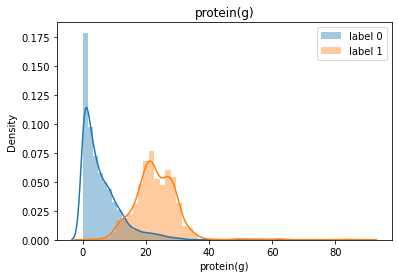

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


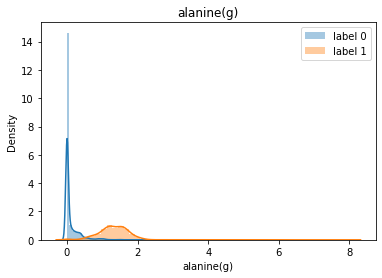

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


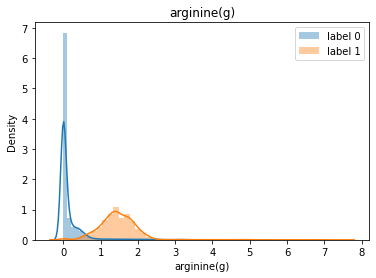

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


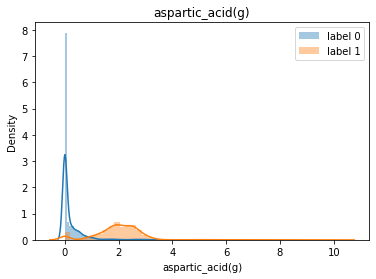

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


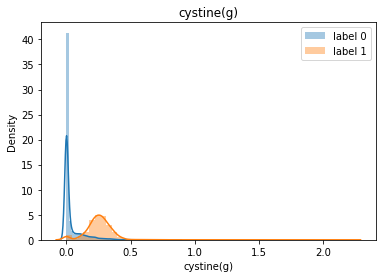

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


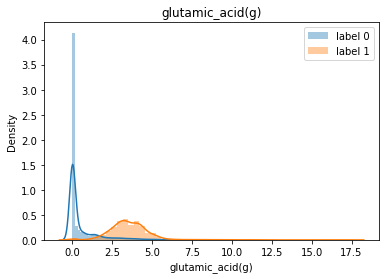

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


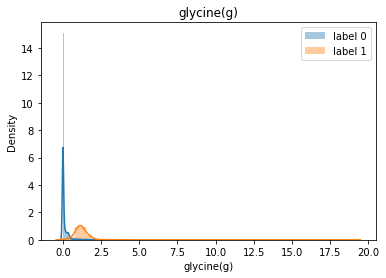

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


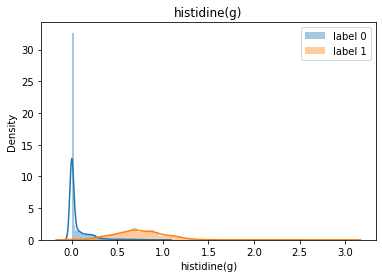

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


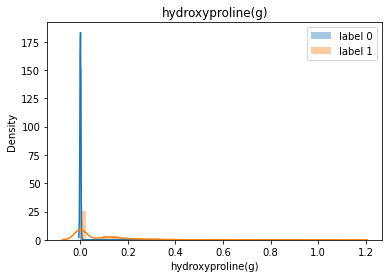

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


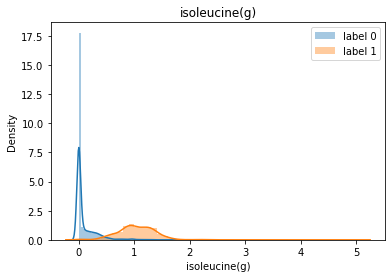

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


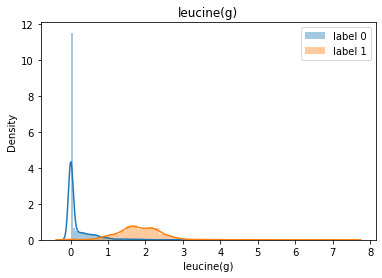

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


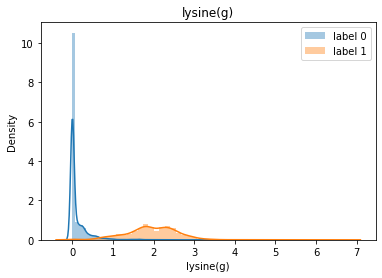

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


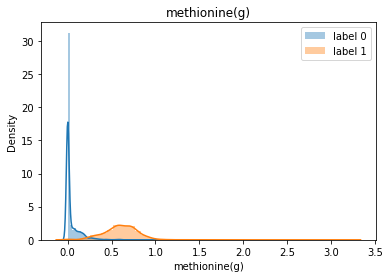

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


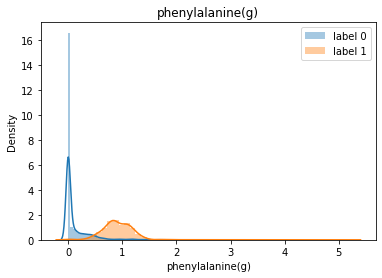

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


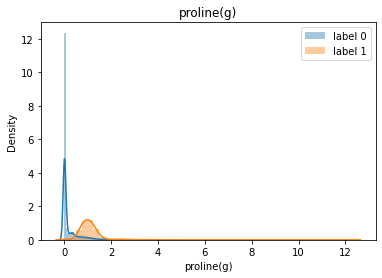

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


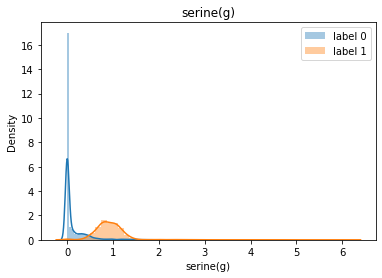

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


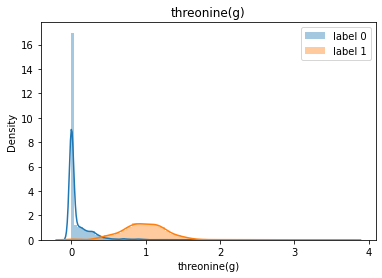

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


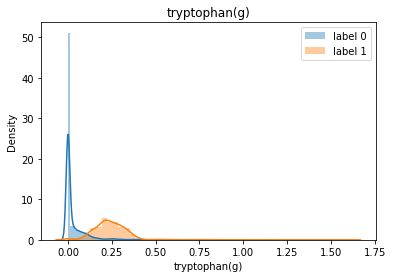

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


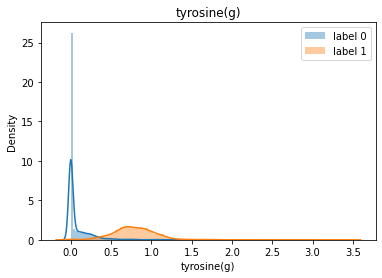

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


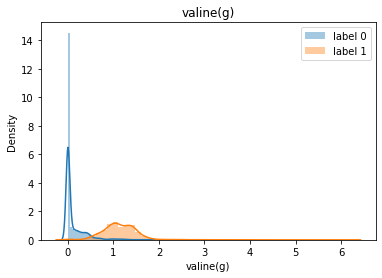

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


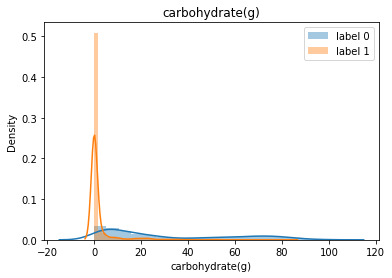

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


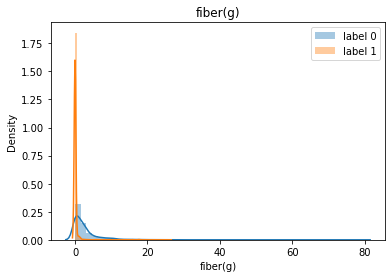

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


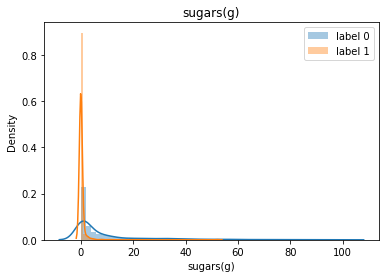

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


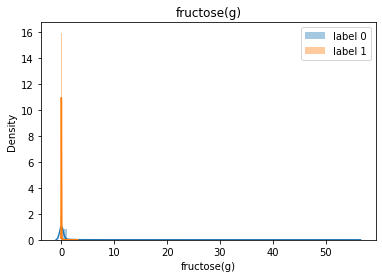

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


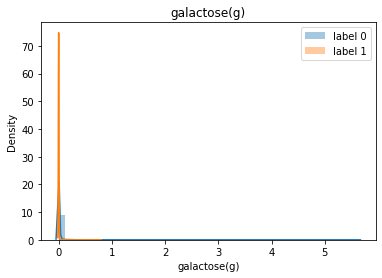

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


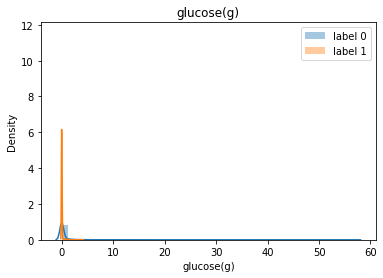

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


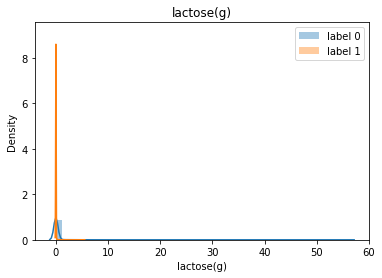

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


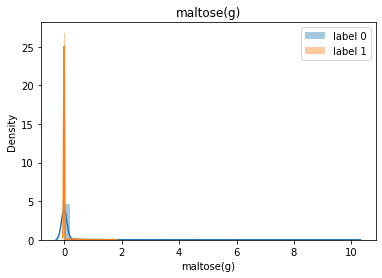

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


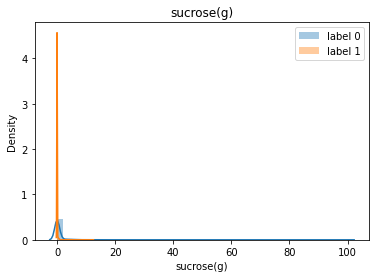

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


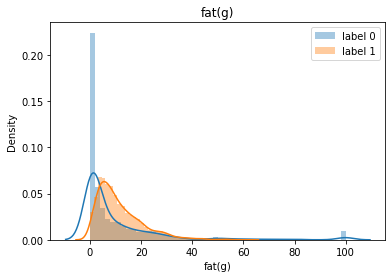

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


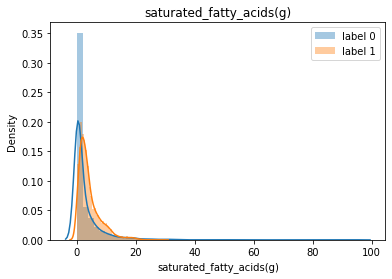

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


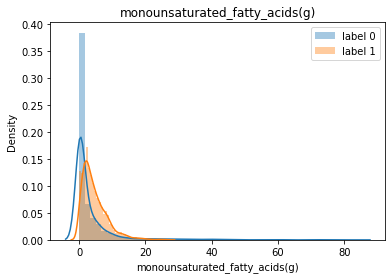

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


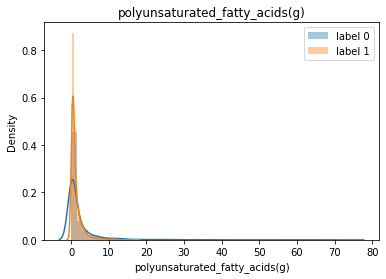

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


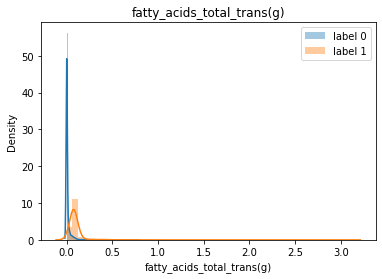

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


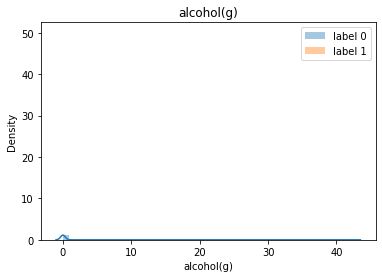

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


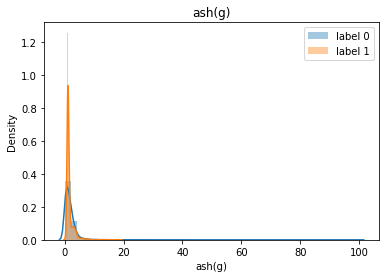

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


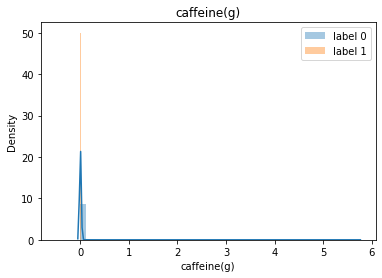

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


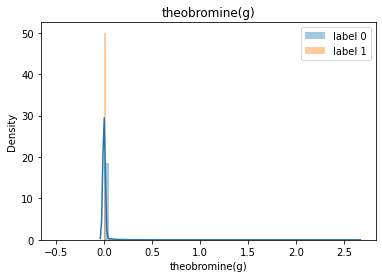

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


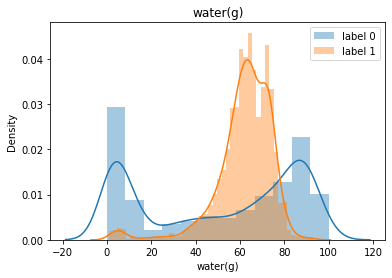

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarnin

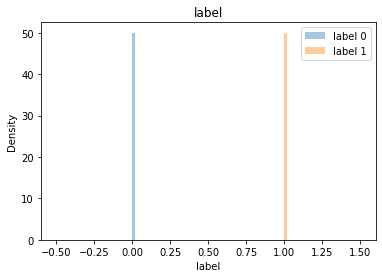

In [ ]:
for i in data.select_dtypes('number').columns:
    sns.distplot(data[data['label'] == 0][i], label = 'label 0')
    sns.distplot(data[data['label'] == 1][i], label = 'label 1')
    plt.title(i)
    plt.legend()
    plt.show()

In [ ]:
data.groupby('label').agg(['mean', 'median', 'std'])

Unnamed: 0                         calories                     \
              mean  median          std        mean median         std   
label                                                                    
0      3782.747483  3735.0  2230.690102  234.602575  182.0  196.079551   
1      5750.622344  6760.0  2648.587776  207.821245  193.0   84.092162   

      total_fat(g)                   saturated_fat(g)                   \
              mean median        std             mean median       std   
label                                                                    
0        10.112411    2.9  18.071048         3.100363    0.6  7.286445   
1        11.543260    9.1   8.911769         4.175385    3.0  3.804666   

      cholesterol(g)                  sodium(g)                  choline(g)  \
                mean median       std      mean median       std       mean   
label                                                                         
0           0.009961  0.000  0.036921  0.337504  0.174  1.096794   0.011481   
1           0.102558  0.078  0.188185  0.237219  0.073  0.404157   0.050758   

                         folate(g)                     folic_acid(g)         \
        median       std      mean    median       std          mean median   
label                                                                         
0      0.00000  0.025915  0.000058  0.000014  0.000149  2.532646e-05    0.0   
1      0.05405  0.077011  0.000014  0.000006  0.000043  5.761905e-07    0.0   

                niacin(g)                    pantothenic_acid(g)            \
            std      mean   median       std                mean    median   
label                                                                        
0      0.000120  0.002590  0.00086  0.005254            0.000363  0.000108   
1      0.000005  0.005198  0.00519  0.002675            0.000754  0.000654   

                riboflavin(g)                     thiamin(g)            \
            std          mean    median       std       mean    median   
label                                                                    
0      0.001417      0.000222  0.000095  0.000498   0.000231  0.000068   
1      0.000692      0.000265  0.000215  0.000275   0.000157  0.000080   

                vitamin_a(g)                     vitamin_a_rae(g)            \
            std         mean median          std             mean    median   
label                                                                         
0      0.000596   885.494801   43.0  4307.368191         0.000106  0.000001   
1      0.000214   212.076190    8.0  1568.721985         0.000061  0.000002   

                carotene_alpha(g)                  carotene_beta(g)         \
            std              mean median       std             mean median   
label                                                                        
0      0.000874      2.866034e-05    0.0  0.000307         0.000204    0.0   
1      0.000470      2.289377e-07    0.0  0.000004         0.000003    0.0   

                cryptoxanthin_beta(g)                  lutein_zeaxanthin(g)  \
            std                  mean median       std                 mean   
label                                                                         
0      0.001236          9.481433e-06    0.0  0.000148             0.000172   
1      0.000023          4.146520e-07    0.0  0.000006             0.000007   

                       lucopene             vitamin_b12(g)            \
      median       std     mean median  std           mean    median   
label                                                                  
0        0.0  0.001093      0.0    0.0  0.0   6.028123e-07  0.000000   
1        0.0  0.000057      0.0    0.0  0.0   2.530930e-06  0.000002   

                vitamin_b6(g)                     vitamin_c(g)          \
            std          mean    median       std         mean  median   
label               

Label 0 indicates food with less protein, more sugar and carbohydrates, more fiber, less fat and cholesterol, and the calories are spread except around 200 calories.

In [ ]:
#Food label 0
data[data['label'] == 0]['food_categories'].value_counts().head(10)

Beverages               280
Cereals ready-to-eat    258
Babyfood                233
Soup                    176
Snacks                  142
Candies                 135
KEEBLER                 125
Beans                   113
Infant formula          102
Cereals                  96
Name: food_categories, dtype: int64

Label 1 indicates food with more protein, less sugar and carbohydrates, less fiber, more fat and cholesterol, and calories is only spread around 200 calories

In [ ]:
#Food label 1
data[data['label'] == 1]['food_categories'].value_counts().head(10)

Beef          932
Pork          304
Lamb          279
Fish          206
Chicken       194
Veal           98
Turkey         84
Cheese         55
Game meat      50
Fast foods     33
Name: food_categories, dtype: int64